In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/c/mooc-dropout-prediction-17/data

In [3]:
data = pd.read_csv('MOOC_Visual.csv', parse_dates=['startdate', 'enddate'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72325 entries, 0 to 72324
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   enrollment_id     72325 non-null  int64         
 1   startdate         72325 non-null  datetime64[ns]
 2   enddate           72325 non-null  datetime64[ns]
 3   access            72325 non-null  int64         
 4   discussion        72325 non-null  int64         
 5   navigate          72325 non-null  int64         
 6   page_close        72325 non-null  int64         
 7   problem           72325 non-null  int64         
 8   video             72325 non-null  int64         
 9   wiki              72325 non-null  int64         
 10  proccess_period   72325 non-null  float64       
 11  present_days      72325 non-null  int64         
 12  effective_time    72325 non-null  float64       
 13  Friday            72325 non-null  int64         
 14  Monday            7232

In [5]:
data.isnull().sum()

enrollment_id       0
startdate           0
enddate             0
access              0
discussion          0
navigate            0
page_close          0
problem             0
video               0
wiki                0
proccess_period     0
present_days        0
effective_time      0
Friday              0
Monday              0
Saturday            0
Sunday              0
Thursday            0
Tuesday             0
Wednesday           0
holidays            0
course_enroll       0
user_enroll         0
course_drop_rate    0
dropout_prob        0
dtype: int64

In [6]:
data.describe()

,enrollment_id,access,discussion,navigate,page_close,problem,video,wiki,proccess_period,present_days,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
count,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,...,72325.000000,72325.000000,72325.000000,72325.000000,72325.00000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000
mean,36163.000000,25.707045,5.247992,8.330052,10.182966,10.446429,6.566678,0.741652,5.790234,2.662067,...,0.328033,0.343173,0.394940,0.409139,0.39870,0.095099,5618.856772,2.460242,0.793640,0.793640
std,20878.573447,54.679282,28.351693,12.641069,20.552585,34.335217,14.662946,3.503804,8.966359,3.093727,...,0.627570,0.649591,0.693014,0.711455,0.68801,0.293918,3686.987244,2.381182,0.066570,0.404695
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,645.000000,1.000000,0.666866,0.000000
25%,18082.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.001204,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2151.000000,1.000000,0.763524,1.000000
50%,36163.000000,6.000000,0.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.045914,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4684.000000,2.000000,0.799671,1.000000
75%,54244.000000,26.000000,2.000000,10.000000,9.000000,6.000000,6.000000,1.000000,9.932766,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,9382.000000,3.000000,0.836914,1.000000
max,72325.000000,3659.000000,1930.000000,409.000000,413.000000,1014.000000,536.000000,243.000000,29.987014,30.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,2.000000,12004.000000,27.000000,0.938356,1.000000


In [7]:
data.head()

,enrollment_id,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
0,1,2014-05-31,2014-06-01,27,0,8,0,79,0,0,...,1,1,0,0,0,0,4684,1,0.826534,1
1,2,2014-06-04,2014-06-04,7,4,3,4,0,3,1,...,0,0,0,0,1,0,7775,1,0.836914,1
2,3,2014-06-04,2014-06-08,34,1,6,7,0,9,0,...,1,1,1,0,1,0,3005,2,0.868481,0
3,4,2014-06-12,2014-06-13,54,4,6,46,21,31,1,...,0,0,1,0,0,0,2981,2,0.799671,1
4,5,2014-07-01,2014-07-01,0,0,2,0,0,0,0,...,0,0,0,1,0,0,10322,1,0.695925,1


In [8]:
data['dropout_prob'].value_counts()

1    57400
0    14925
Name: dropout_prob, dtype: int64

#seems dataset is not balance

(array([7.21e+04, 2.14e+02, 4.00e+00, 5.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00]),
 array([   0. ,  365.9,  731.8, 1097.7, 1463.6, 1829.5, 2195.4, 2561.3,
        2927.2, 3293.1, 3659. ]),
 <a list of 10 Patch objects>)

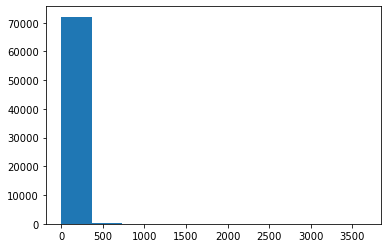

In [9]:
plt.hist(data['access'])

In [10]:
data['access'].value_counts()

0       17485
2        6397
3        4002
4        3117
5        2803
        ...  
3659        1
416         1
1438        1
669         1
447         1
Name: access, Length: 511, dtype: int64

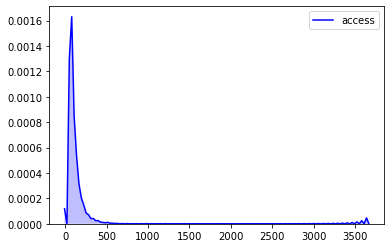

In [11]:
sns.kdeplot(data['access'], color='b', shade=True)

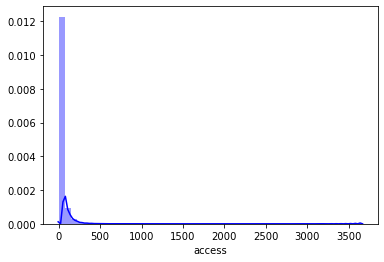

In [12]:
sns.distplot(data['access'], color='b', kde=True)

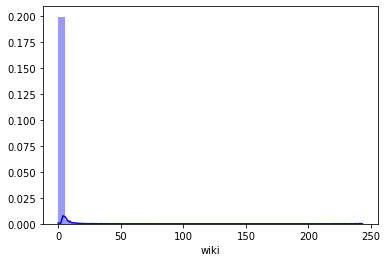

In [13]:
sns.distplot(data['wiki'], color='b', kde=True)

In [14]:
data['wiki'].value_counts()

0      53589
1      10299
2       3575
3       1707
4        937
       ...  
52         1
243        1
175        1
113        1
127        1
Name: wiki, Length: 84, dtype: int64

In [15]:
col = data.columns

In [16]:
col.size

25

In [17]:
col

Index(['enrollment_id', 'startdate', 'enddate', 'access', 'discussion',
       'navigate', 'page_close', 'problem', 'video', 'wiki', 'proccess_period',
       'present_days', 'effective_time', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'holidays',
       'course_enroll', 'user_enroll', 'course_drop_rate', 'dropout_prob'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


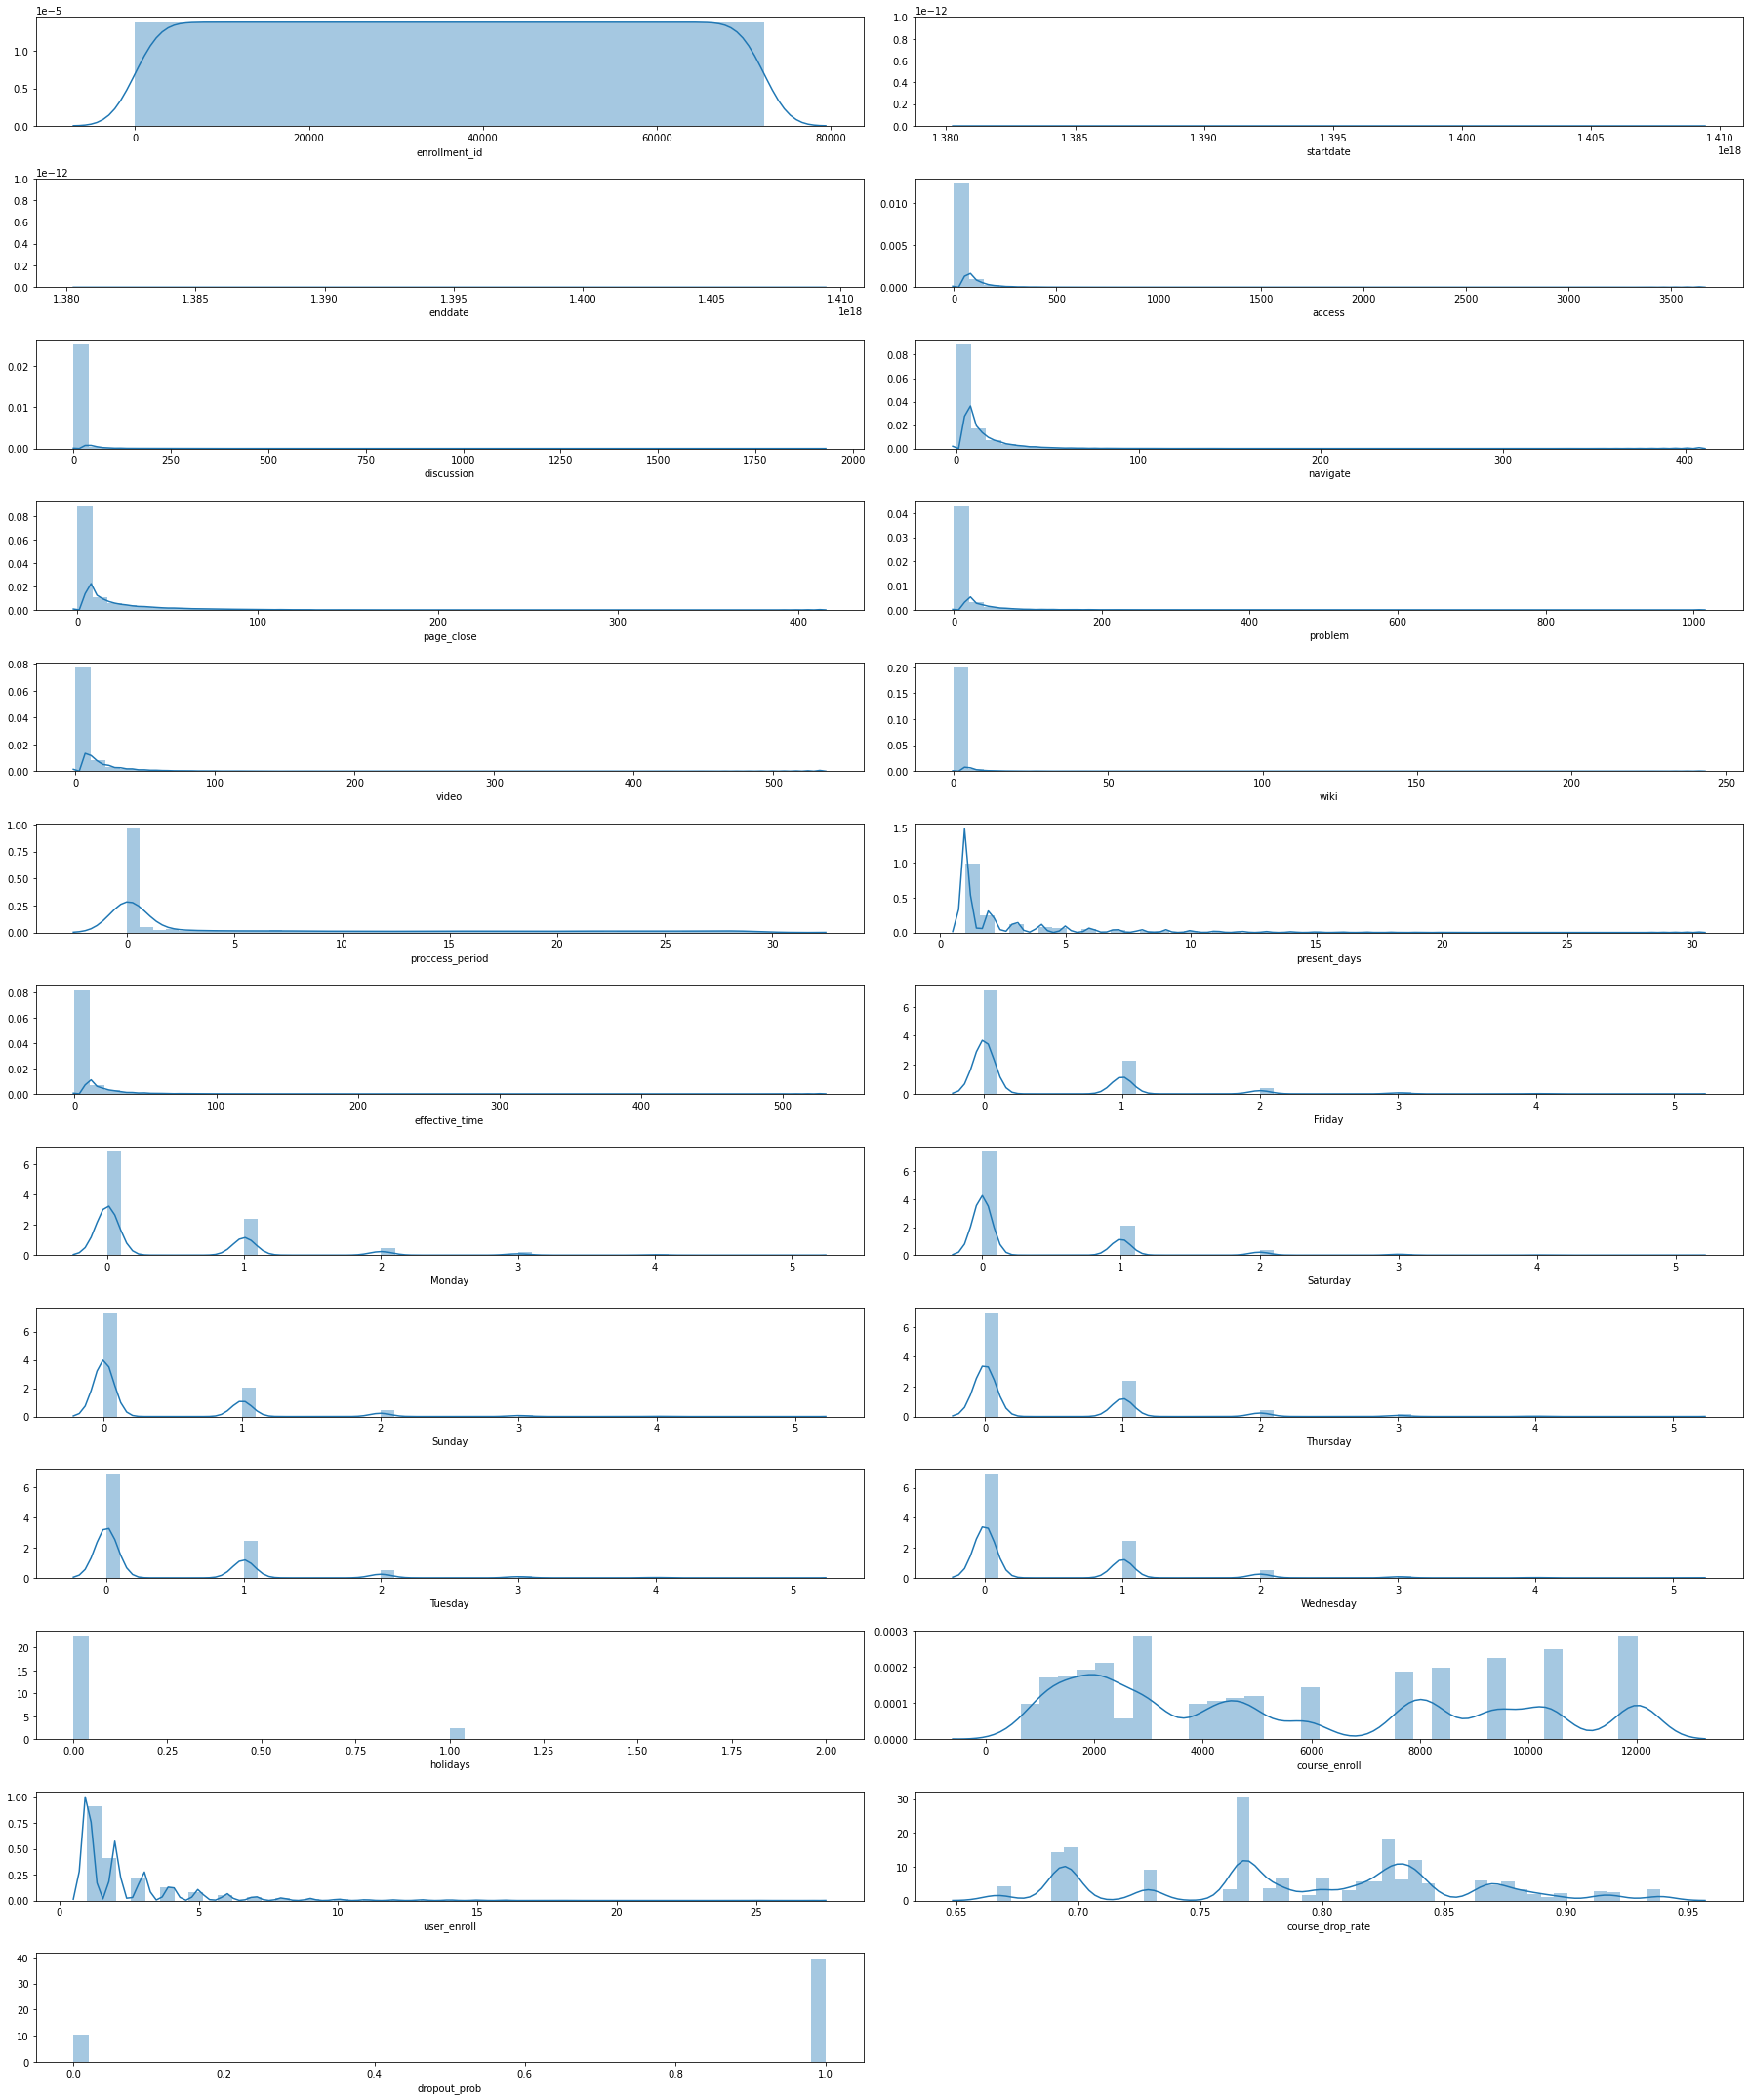

In [18]:
plt.figure(figsize=(25,30))
plotno=1

for i in col:
    plt.subplot(13,2,plotno)
    sns.distplot(data[i])
    plotno +=1
    plt.tight_layout()


In [19]:
data[data['dropout_prob']==1].shape

(57400, 25)

In [20]:
data[data['dropout_prob']==0].shape

(14925, 25)

In [21]:
dropout_prob_majority = data[data['dropout_prob']==1]

In [22]:
dropout_prob_majority.shape

(57400, 25)

In [23]:
dropout_prob_minority = data[data['dropout_prob']==0]

In [24]:
dropout_prob_minority.shape

(14925, 25)

# balancing Data set using upsampling

In [25]:
from sklearn.utils import resample

In [26]:
dropout_prob_minority_balanced = resample(dropout_prob_minority, replace=True, n_samples=dropout_prob_majority.shape[0])

In [27]:
dropout_prob_minority_balanced

,enrollment_id,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
5025,5026,2014-06-12,2014-06-12,0,0,3,0,0,0,0,...,0,0,1,0,0,0,8223,1,0.767759,0
70240,70241,2014-06-16,2014-06-23,195,10,43,57,59,7,5,...,1,1,1,1,1,0,5890,2,0.728608,0
41950,41951,2014-06-11,2014-06-25,133,25,44,2,67,3,2,...,0,0,2,0,2,0,8223,1,0.767759,0
569,570,2014-05-28,2014-06-19,67,2,23,49,44,10,5,...,0,0,1,0,1,0,8223,1,0.767759,0
70924,70925,2013-11-13,2013-12-10,169,54,29,92,37,34,2,...,2,1,1,3,1,0,9382,1,0.692294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53195,53196,2014-05-26,2014-06-13,107,25,14,4,16,0,0,...,1,2,0,0,0,1,2796,1,0.666866,0
12627,12628,2013-12-02,2013-12-31,408,11,78,128,696,118,2,...,2,3,3,4,1,0,1933,3,0.843426,0
64676,64677,2014-07-12,2014-07-27,0,0,2,0,0,0,0,...,1,1,0,0,0,0,1471,1,0.919355,0
19092,19093,2013-11-18,2013-12-09,244,27,56,174,77,94,3,...,0,2,2,2,1,1,9382,2,0.692294,0


In [28]:
data_balanced = pd.concat([dropout_prob_majority, dropout_prob_minority_balanced])

In [29]:
data_balanced.head()

,enrollment_id,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
0,1,2014-05-31,2014-06-01,27,0,8,0,79,0,0,...,1,1,0,0,0,0,4684,1,0.826534,1
1,2,2014-06-04,2014-06-04,7,4,3,4,0,3,1,...,0,0,0,0,1,0,7775,1,0.836914,1
3,4,2014-06-12,2014-06-13,54,4,6,46,21,31,1,...,0,0,1,0,0,0,2981,2,0.799671,1
4,5,2014-07-01,2014-07-01,0,0,2,0,0,0,0,...,0,0,0,1,0,0,10322,1,0.695925,1
5,6,2014-07-16,2014-07-16,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1481,2,0.823991,1


In [30]:
data_balanced.shape

(114800, 25)

In [31]:
# using PCA for component analysis

In [32]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [33]:
X = data_balanced.drop(['dropout_prob', 'enrollment_id'], axis=1)

In [34]:
y = data_balanced['dropout_prob']

In [35]:
X['startdate'] = X['startdate'].map(datetime.datetime.toordinal)

In [36]:
X['enddate'] = X['enddate'].map(datetime.datetime.toordinal)

In [37]:
X.head()

,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,proccess_period,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate
0,735384,735385,27,0,8,0,79,0,0,1.053588,...,0,1,1,0,0,0,0,4684,1,0.826534
1,735388,735388,7,4,3,4,0,3,1,0.016782,...,0,0,0,0,0,1,0,7775,1,0.836914
3,735396,735397,54,4,6,46,21,31,1,0.766829,...,0,0,0,1,0,0,0,2981,2,0.799671
4,735415,735415,0,0,2,0,0,0,0,0.000150,...,0,0,0,0,1,0,0,10322,1,0.695925
5,735430,735430,0,0,1,0,0,0,0,0.000000,...,0,0,0,0,0,1,0,1481,2,0.823991


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
st = StandardScaler()

In [40]:
X = st.fit_transform(X)

In [41]:
X

array([[ 0.6329321 ,  0.54081648, -0.23220026, ..., -0.32308744,
        -0.62648324,  0.61236509],
       [ 0.67798658,  0.57468887, -0.49614701, ...,  0.51102165,
        -0.62648324,  0.76855315],
       [ 0.76809555,  0.67630602,  0.12412786, ..., -0.7826435 ,
        -0.24291048,  0.20815863],
       ...,
       [ 1.10600417,  1.173101  , -0.58852837, ..., -1.19011833,
        -0.62648324,  2.00900488],
       [-1.55221036, -1.42378182,  2.63162198, ...,  0.94467203,
        -0.24291048, -1.40750201],
       [ 0.67798658,  0.82308636,  0.05814117, ...,  0.51102165,
        -0.24291048,  0.76855315]])

In [42]:
pca = PCA()

In [43]:
pca.fit(X)

PCA()

In [44]:
pca.explained_variance_ratio_

array([3.92438539e-01, 9.37042930e-02, 7.08881252e-02, 5.10280415e-02,
       4.51651747e-02, 3.92212434e-02, 3.35119146e-02, 3.33398882e-02,
       3.12802389e-02, 3.04825275e-02, 2.46302680e-02, 2.35556149e-02,
       2.21191008e-02, 2.11886330e-02, 2.00632094e-02, 1.64174720e-02,
       1.44908852e-02, 1.21044585e-02, 9.39811210e-03, 8.60625538e-03,
       6.36588565e-03, 1.18987353e-07, 3.49993406e-33])

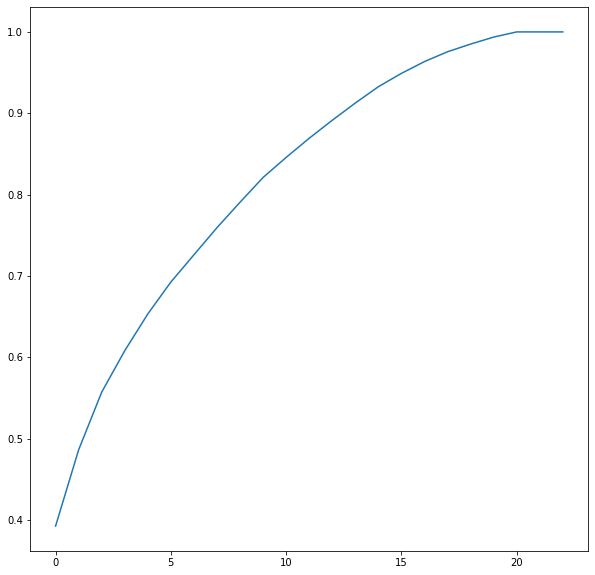

In [45]:
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_.cumsum())

# we can see that 19-20 feature can explain our 99% data

In [46]:
pca = PCA(n_components=19)

In [47]:
X = pca.fit_transform(X)

In [48]:
X

array([[-1.32471784,  1.07746487,  0.19875141, ..., -0.05349661,
         0.08877623, -0.27416026],
       [-2.12942146,  0.61354498, -0.36231146, ..., -0.706345  ,
        -0.0568248 , -0.02813186],
       [-0.6499375 ,  1.21429775,  0.20873048, ...,  0.18150286,
        -0.25409456, -0.47103581],
       ...,
       [-1.69015369,  2.2159195 ,  0.67603816, ..., -0.62049089,
        -0.09032525,  0.42557585],
       [ 8.59748071, -2.43912848,  0.13272822, ..., -0.7257765 ,
         0.19794314, -1.35480962],
       [ 3.90305707,  0.83819381, -0.81546376, ..., -1.0597667 ,
        -1.26344885, -0.70433656]])

In [54]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

In [69]:
xgb = XGBClassifier(objective='binary:logistic')

In [70]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred = xgb.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [73]:
print(confusion_matrix(y_test, y_pred))

[[13920  3239]
 [ 2450 14831]]


In [74]:
print(accuracy_score(y_test, y_pred))

0.8348141695702671


In [75]:
print(f1_score(y_test, y_pred))

0.8390710305224746


In [76]:
y_pred_train = xgb.predict(X_train)

In [77]:
print(accuracy_score(y_train, y_pred_train))

0.8705326032852165


In [78]:
print(f1_score(y_train, y_pred_train))

0.8743447909369793


In [79]:
print(confusion_matrix(y_pred_train, y_train))

[[33759  3922]
 [ 6482 36197]]


In [81]:
#using GridSearch CV for best param
XGBClassifier()

In [109]:
param_grid = {'learning_rate':[0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8], 'booster': ['gbtree', 'gblinear', 'dart']}

In [110]:
param_grid

{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
 'booster': ['gbtree', 'gblinear', 'dart']}

In [111]:
gridCV = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=20, return_train_score=True)

In [112]:
gridCV.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  1

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [113]:
gridCV.best_params_

{'booster': 'gbtree', 'learning_rate': 0.7}

In [114]:
gridCV.best_score_

0.8594325535092086

In [115]:
result = pd.DataFrame(gridCV.cv_results_)

In [116]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,41.226112,0.262069,0.149964,0.015931,gbtree,0.1,"{'booster': 'gbtree', 'learning_rate': 0.1}",0.816949,0.819064,0.815269,...,0.815953,0.001861,15,0.831368,0.831773,0.833048,0.833126,0.831010,0.832065,0.000869
1,35.736620,6.763490,0.133807,0.019042,gbtree,0.2,"{'booster': 'gbtree', 'learning_rate': 0.2}",0.829766,0.831570,0.828584,...,0.828459,0.002089,13,0.856645,0.858869,0.859025,0.855665,0.858605,0.857762,0.001355
2,27.250944,0.108757,0.120998,0.006013,gbtree,0.3,"{'booster': 'gbtree', 'learning_rate': 0.3}",0.836672,0.842023,0.836984,...,0.837755,0.002254,11,0.877691,0.879682,0.882482,0.880989,0.879682,0.880105,0.001588
3,27.227742,0.081426,0.120688,0.006401,gbtree,0.4,"{'booster': 'gbtree', 'learning_rate': 0.4}",0.846814,0.846877,0.845757,...,0.846155,0.001507,9,0.899966,0.894802,0.898317,0.897073,0.900261,0.898084,0.002007
4,27.211424,0.151044,0.119808,0.010232,gbtree,0.5,"{'booster': 'gbtree', 'learning_rate': 0.5}",0.851481,0.848432,0.848494,...,0.848395,0.002396,7,0.909408,0.905037,0.912208,0.912332,0.909423,0.909681,0.002650


In [117]:
# plot the result

In [122]:
# plt.figure(figsize=(10,10))
# plt.plot(result['param_learning_rate'], result['mean_train_score'])
# plt.plot(result['param_learning_rate'], result['mean_test_score'])

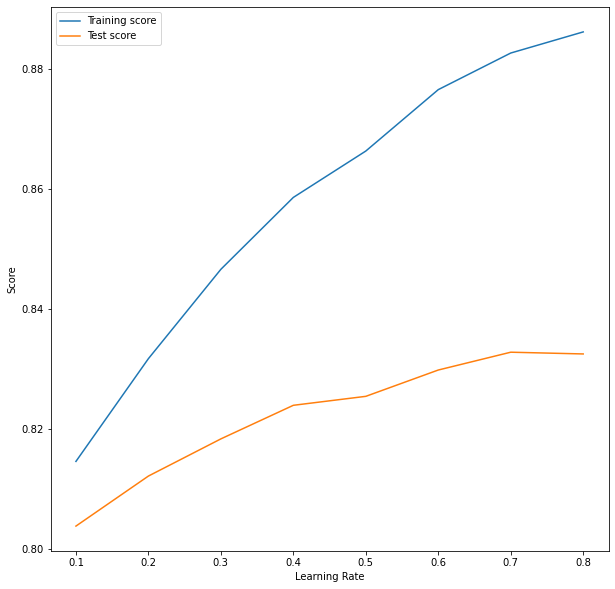

In [120]:
plt.figure(figsize=(10,10))
plt.plot(result.groupby('param_learning_rate').mean()['mean_train_score'], label='Training score')
plt.plot(result.groupby('param_learning_rate').mean()['mean_test_score'], label = 'Test score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.legend()

In [123]:
gridCV.best_params_

{'booster': 'gbtree', 'learning_rate': 0.7}

In [124]:
xgb_final = XGBClassifier(objective='binary:logistic', learning_rate=0.7, booster='gbtree')

In [125]:
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
y_pred_final = xgb_final.predict(X_test)

In [127]:
y_pred_train = xgb_final.predict(X_train)

In [128]:
print(accuracy_score(y_test, y_pred_final))

0.8611788617886179


In [129]:
print(f1_score(y_test, y_pred_final))

0.8604535769533873


In [130]:
print(accuracy_score(y_train, y_pred_train))

0.9266923842707815


In [131]:
print(f1_score(y_train, y_pred_train))

0.9276227685427494
